### IMPORTING LIBRARIES AND THEIR MODULES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import pandas as pd

### LOADING PREDICTOR FILE

In [2]:
pred = np.loadtxt(r"C:\Users\Chaitanya\Desktop\MDSI\output.txt")

### LOADING TARGET FILE

In [3]:
targ = np.loadtxt(r"C:\Users\Chaitanya\Desktop\MDSI\egap.txt")

### FINGERPRINTING

In [4]:
predictors = np.zeros(3)
for i in range(pred.shape[0]):
    fc = pred[i,0] / np.sum(pred[i])
    fh = pred[i,1] / np.sum(pred[i])
    fo = pred[i,2] / np.sum(pred[i])
    temp = np.array([fc, fh, fo])
    predictors = np.vstack((predictors, temp))
predictors = np.delete(predictors, 0, axis=0)

### INPUT FILE

In [5]:
predictors

array([[0.36363636, 0.45454545, 0.18181818],
       [0.34285714, 0.57142857, 0.08571429],
       [0.33333333, 0.6       , 0.06666667],
       [0.51724138, 0.34482759, 0.13793103],
       [0.33333333, 0.33333333, 0.33333333],
       [0.37037037, 0.59259259, 0.03703704],
       [0.58333333, 0.33333333, 0.08333333],
       [0.33333333, 0.53333333, 0.13333333],
       [0.3125    , 0.5625    , 0.125     ],
       [0.5       , 0.36363636, 0.13636364],
       [0.45833333, 0.5       , 0.04166667],
       [0.30769231, 0.53846154, 0.15384615],
       [0.30769231, 0.53846154, 0.15384615],
       [0.43478261, 0.43478261, 0.13043478],
       [0.43478261, 0.39130435, 0.17391304],
       [0.38461538, 0.53846154, 0.07692308],
       [0.5       , 0.41666667, 0.08333333],
       [0.33333333, 0.5       , 0.16666667],
       [0.45454545, 0.45454545, 0.09090909],
       [0.38461538, 0.38461538, 0.23076923],
       [0.28      , 0.48      , 0.24      ],
       [0.52380952, 0.28571429, 0.19047619],
       [0.

### STANDARDIZATION

In [6]:
scaler = StandardScaler()
normal_predictors = scaler.fit_transform(predictors)

In [7]:
normal_predictors

array([[-3.00924831e-01, -2.39039745e-01,  5.41428463e-01],
       [-5.26657465e-01,  9.17884936e-01, -4.62092461e-01],
       [-6.30118255e-01,  1.20068875e+00, -6.60988499e-01],
       [ 1.36774528e+00, -1.32504184e+00,  8.31570252e-02],
       [-6.30118255e-01, -1.43881349e+00,  2.12355604e+00],
       [-2.27770737e-01,  1.12736924e+00, -9.70382338e-01],
       [ 2.08572749e+00, -1.43881349e+00, -4.86954465e-01],
       [-6.30118255e-01,  5.40813188e-01,  3.51476365e-02],
       [-8.56438734e-01,  8.29508745e-01, -5.18693805e-02],
       [ 1.18044558e+00, -1.13887005e+00,  6.67901882e-02],
       [ 7.27804619e-01,  2.10875409e-01, -9.22039550e-01],
       [-9.08666537e-01,  5.91572847e-01,  2.49343371e-01],
       [-9.08666537e-01,  5.91572847e-01,  2.49343371e-01],
       [ 4.71964077e-01, -4.34655030e-01,  4.88084802e-03],
       [ 4.71964077e-01, -8.65008655e-01,  4.58882676e-01],
       [-7.30216917e-02,  5.91572847e-01, -5.53890632e-01],
       [ 1.18044558e+00, -6.13969040e-01

### TRAINING AND TESTING DATA

In [8]:
normal_predictor_train, normal_predictor_test, targ_train, targ_test = train_test_split(normal_predictors, targ, test_size=0.20, random_state=8, shuffle=True)
n_cols = normal_predictors.shape[1]

### DESIGNING THE NETWORK

In [31]:
def regression_model():
    model = Sequential()
    model.add(Dense(1000, activation='relu', input_shape=(n_cols,)))    # 1st layer 1000  neurons
    model.add(Dense(1000, activation='relu', input_shape=(n_cols,)))    # 2nd layer 1000  neurons
    model.add(Dense(800, activation='relu', input_shape=(n_cols,)))     # 3rd layer 800  neurons
    model.add(Dropout(0.2))                                             # Dropping 20% of the values after last hidden layer
    model.add(Dense(1, activation='linear'))
 
    model.compile(optimizer='adam', loss='mean_squared_error')          # Adam optimizer and L2 norm loss function is used
    return model

model = regression_model()

### ITERATION AND CALCULATION OF LOSS AND VALIDATION LOSS

In [32]:
trial = model.fit(normal_predictor_train, targ_train, epochs=1500, verbose=1, validation_split=0.01)

Epoch 1/1500
6/6 [==============================] - 1s 54ms/step - loss: 8.8526 - val_loss: 1.6128
Epoch 2/1500
6/6 [==============================] - 0s 32ms/step - loss: 3.3325 - val_loss: 2.6175
Epoch 3/1500
6/6 [==============================] - 0s 32ms/step - loss: 2.8296 - val_loss: 0.4428
Epoch 4/1500
6/6 [==============================] - 0s 31ms/step - loss: 2.1058 - val_loss: 0.8555
Epoch 5/1500
6/6 [==============================] - 0s 31ms/step - loss: 1.6740 - val_loss: 0.4805
Epoch 6/1500
6/6 [==============================] - 0s 31ms/step - loss: 1.4692 - val_loss: 0.2582
Epoch 7/1500
6/6 [==============================] - 0s 29ms/step - loss: 1.5878 - val_loss: 0.2027
Epoch 8/1500
6/6 [==============================] - 0s 36ms/step - loss: 1.1219 - val_loss: 0.1350
Epoch 9/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.9271 - val_loss: 0.5705
Epoch 10/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.7744 - val_loss: 0.2087
Epoch 11/

6/6 [==============================] - 0s 28ms/step - loss: 0.4900 - val_loss: 0.0804
Epoch 84/1500
6/6 [==============================] - 0s 28ms/step - loss: 0.4597 - val_loss: 0.1697
Epoch 85/1500
6/6 [==============================] - 0s 28ms/step - loss: 0.4951 - val_loss: 0.0062
Epoch 86/1500
6/6 [==============================] - 0s 28ms/step - loss: 0.4509 - val_loss: 0.0792
Epoch 87/1500
6/6 [==============================] - 0s 28ms/step - loss: 0.4690 - val_loss: 0.0101
Epoch 88/1500
6/6 [==============================] - 0s 28ms/step - loss: 0.4864 - val_loss: 0.2997
Epoch 89/1500
6/6 [==============================] - 0s 25ms/step - loss: 0.4725 - val_loss: 0.0458
Epoch 90/1500
6/6 [==============================] - 0s 28ms/step - loss: 0.5269 - val_loss: 0.0283
Epoch 91/1500
6/6 [==============================] - 0s 34ms/step - loss: 0.5115 - val_loss: 0.1815
Epoch 92/1500
6/6 [==============================] - 0s 34ms/step - loss: 0.5075 - val_loss: 0.0188
Epoch 93/1500


6/6 [==============================] - 0s 29ms/step - loss: 0.3913 - val_loss: 0.0118
Epoch 165/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.3824 - val_loss: 0.0281
Epoch 166/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.3960 - val_loss: 0.0379
Epoch 167/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.4256 - val_loss: 0.1650
Epoch 168/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.3972 - val_loss: 0.0901
Epoch 169/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.4290 - val_loss: 0.0229
Epoch 170/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.3908 - val_loss: 0.0047
Epoch 171/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.4076 - val_loss: 0.1194
Epoch 172/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.4189 - val_loss: 0.0666
Epoch 173/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.4928 - val_loss: 0.2068
Epoch

6/6 [==============================] - 0s 32ms/step - loss: 0.4210 - val_loss: 0.1460
Epoch 246/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.4065 - val_loss: 0.0427
Epoch 247/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.3666 - val_loss: 0.0696
Epoch 248/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.3868 - val_loss: 0.1234
Epoch 249/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.3859 - val_loss: 0.1059
Epoch 250/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.4151 - val_loss: 0.1844
Epoch 251/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.3801 - val_loss: 0.0676
Epoch 252/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.3973 - val_loss: 0.2198
Epoch 253/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.4114 - val_loss: 0.1258
Epoch 254/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.4109 - val_loss: 0.2840
Epoch

6/6 [==============================] - 0s 31ms/step - loss: 0.3507 - val_loss: 0.2107
Epoch 327/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.3587 - val_loss: 0.2715
Epoch 328/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.3494 - val_loss: 0.1039
Epoch 329/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.3742 - val_loss: 0.1820
Epoch 330/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.3458 - val_loss: 0.1829
Epoch 331/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.3038 - val_loss: 0.3065
Epoch 332/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.3560 - val_loss: 0.1187
Epoch 333/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.3604 - val_loss: 0.2624
Epoch 334/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.3770 - val_loss: 0.3068
Epoch 335/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.4391 - val_loss: 0.0590
Epoch

6/6 [==============================] - 0s 33ms/step - loss: 0.3087 - val_loss: 0.1037
Epoch 408/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.3332 - val_loss: 0.0988
Epoch 409/1500
6/6 [==============================] - 0s 34ms/step - loss: 0.3113 - val_loss: 0.2891
Epoch 410/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.3293 - val_loss: 0.2221
Epoch 411/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.3544 - val_loss: 0.2675
Epoch 412/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.3406 - val_loss: 0.0929
Epoch 413/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.3113 - val_loss: 0.1774
Epoch 414/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.3306 - val_loss: 0.1341
Epoch 415/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2863 - val_loss: 0.7772
Epoch 416/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.3798 - val_loss: 0.2013
Epoch

6/6 [==============================] - 0s 31ms/step - loss: 0.3082 - val_loss: 0.1577
Epoch 489/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2843 - val_loss: 0.1472
Epoch 490/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.3000 - val_loss: 0.1320
Epoch 491/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2741 - val_loss: 0.2159
Epoch 492/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.3252 - val_loss: 0.1690
Epoch 493/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.3200 - val_loss: 0.2381
Epoch 494/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2945 - val_loss: 0.4585
Epoch 495/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2961 - val_loss: 0.2751
Epoch 496/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2935 - val_loss: 0.1775
Epoch 497/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.3422 - val_loss: 0.1851
Epoch

6/6 [==============================] - 0s 28ms/step - loss: 0.2624 - val_loss: 0.1762
Epoch 570/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.2566 - val_loss: 0.1542
Epoch 571/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.3511 - val_loss: 0.2759
Epoch 572/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2829 - val_loss: 0.2357
Epoch 573/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.3026 - val_loss: 0.5909
Epoch 574/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2848 - val_loss: 0.3824
Epoch 575/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2827 - val_loss: 0.1667
Epoch 576/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.2698 - val_loss: 0.3140
Epoch 577/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2524 - val_loss: 0.3729
Epoch 578/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2549 - val_loss: 0.1800
Epoch

6/6 [==============================] - 0s 31ms/step - loss: 0.2442 - val_loss: 0.3112
Epoch 651/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2590 - val_loss: 0.4876
Epoch 652/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2414 - val_loss: 0.4733
Epoch 653/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2418 - val_loss: 0.2683
Epoch 654/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2648 - val_loss: 0.4084
Epoch 655/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2333 - val_loss: 0.3069
Epoch 656/1500
6/6 [==============================] - 0s 26ms/step - loss: 0.2554 - val_loss: 0.1395
Epoch 657/1500
6/6 [==============================] - 0s 35ms/step - loss: 0.2276 - val_loss: 0.3586
Epoch 658/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2188 - val_loss: 0.3437
Epoch 659/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2307 - val_loss: 0.6482
Epoch

6/6 [==============================] - 0s 31ms/step - loss: 0.2461 - val_loss: 0.1562
Epoch 732/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2360 - val_loss: 0.2329
Epoch 733/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2295 - val_loss: 0.4383
Epoch 734/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2265 - val_loss: 0.2672
Epoch 735/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2286 - val_loss: 0.3137
Epoch 736/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2091 - val_loss: 0.3788
Epoch 737/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.1972 - val_loss: 0.2979
Epoch 738/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2059 - val_loss: 0.2661
Epoch 739/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2311 - val_loss: 0.5019
Epoch 740/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2134 - val_loss: 0.4315
Epoch

6/6 [==============================] - 0s 31ms/step - loss: 0.2262 - val_loss: 0.2149
Epoch 813/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.2164 - val_loss: 0.2280
Epoch 814/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2204 - val_loss: 0.3370
Epoch 815/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2330 - val_loss: 0.1795
Epoch 816/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2292 - val_loss: 0.2142
Epoch 817/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.1884 - val_loss: 0.3691
Epoch 818/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2155 - val_loss: 0.1923
Epoch 819/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2112 - val_loss: 0.1921
Epoch 820/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.1954 - val_loss: 0.4897
Epoch 821/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2415 - val_loss: 0.7881
Epoch

6/6 [==============================] - 0s 30ms/step - loss: 0.2022 - val_loss: 0.2557
Epoch 894/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2360 - val_loss: 0.3221
Epoch 895/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2040 - val_loss: 0.2568
Epoch 896/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2084 - val_loss: 0.2787
Epoch 897/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2301 - val_loss: 0.3227
Epoch 898/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.2177 - val_loss: 0.3468
Epoch 899/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.1996 - val_loss: 0.2017
Epoch 900/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2183 - val_loss: 0.2165
Epoch 901/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.1886 - val_loss: 0.3154
Epoch 902/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2068 - val_loss: 0.2715
Epoch

6/6 [==============================] - 0s 31ms/step - loss: 0.2344 - val_loss: 0.2367
Epoch 975/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2271 - val_loss: 0.3355
Epoch 976/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2130 - val_loss: 0.0980
Epoch 977/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2339 - val_loss: 0.1119
Epoch 978/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2708 - val_loss: 0.1319
Epoch 979/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2976 - val_loss: 0.2384
Epoch 980/1500
6/6 [==============================] - 0s 33ms/step - loss: 0.2780 - val_loss: 0.1970
Epoch 981/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2556 - val_loss: 0.2140
Epoch 982/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2453 - val_loss: 0.3179
Epoch 983/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2242 - val_loss: 0.2892
Epoch

6/6 [==============================] - 0s 31ms/step - loss: 0.1913 - val_loss: 0.2717
Epoch 1055/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2039 - val_loss: 0.2796
Epoch 1056/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2138 - val_loss: 0.2740
Epoch 1057/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2046 - val_loss: 0.3075
Epoch 1058/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2288 - val_loss: 0.2586
Epoch 1059/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2040 - val_loss: 0.2677
Epoch 1060/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2100 - val_loss: 0.2779
Epoch 1061/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.1980 - val_loss: 0.3774
Epoch 1062/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2561 - val_loss: 0.2410
Epoch 1063/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2288 - val_loss: 0.2

6/6 [==============================] - 0s 30ms/step - loss: 0.2268 - val_loss: 0.2922
Epoch 1135/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.2084 - val_loss: 0.2212
Epoch 1136/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.1985 - val_loss: 0.2056
Epoch 1137/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2067 - val_loss: 0.2036
Epoch 1138/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.1854 - val_loss: 0.1819
Epoch 1139/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.1923 - val_loss: 0.2584
Epoch 1140/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.1868 - val_loss: 0.3375
Epoch 1141/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2101 - val_loss: 0.2094
Epoch 1142/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2170 - val_loss: 0.1923
Epoch 1143/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2105 - val_loss: 0.2

6/6 [==============================] - 0s 31ms/step - loss: 0.1926 - val_loss: 0.2686
Epoch 1215/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.1963 - val_loss: 0.3368
Epoch 1216/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2041 - val_loss: 0.2757
Epoch 1217/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.1918 - val_loss: 0.2209
Epoch 1218/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.1893 - val_loss: 0.2310
Epoch 1219/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2000 - val_loss: 0.2259
Epoch 1220/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.1871 - val_loss: 0.2530
Epoch 1221/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.1919 - val_loss: 0.3097
Epoch 1222/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.1946 - val_loss: 0.3077
Epoch 1223/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2123 - val_loss: 0.3

6/6 [==============================] - 0s 31ms/step - loss: 0.1969 - val_loss: 0.2551
Epoch 1295/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.1855 - val_loss: 0.2053
Epoch 1296/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2033 - val_loss: 0.2162
Epoch 1297/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.1840 - val_loss: 0.3929
Epoch 1298/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.1888 - val_loss: 0.3478
Epoch 1299/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2102 - val_loss: 0.2463
Epoch 1300/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.1968 - val_loss: 0.2920
Epoch 1301/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.1876 - val_loss: 0.3625
Epoch 1302/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.1990 - val_loss: 0.4966
Epoch 1303/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2117 - val_loss: 0.4

6/6 [==============================] - 0s 31ms/step - loss: 0.1820 - val_loss: 0.1260
Epoch 1375/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.1799 - val_loss: 0.2187
Epoch 1376/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.1980 - val_loss: 0.2884
Epoch 1377/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.2029 - val_loss: 0.2218
Epoch 1378/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.2024 - val_loss: 0.2524
Epoch 1379/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.1865 - val_loss: 0.2541
Epoch 1380/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.1991 - val_loss: 0.0759
Epoch 1381/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.1905 - val_loss: 0.1785
Epoch 1382/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.1808 - val_loss: 0.2492
Epoch 1383/1500
6/6 [==============================] - 0s 28ms/step - loss: 0.1781 - val_loss: 0.4

6/6 [==============================] - 0s 35ms/step - loss: 0.1716 - val_loss: 0.2803
Epoch 1455/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.1952 - val_loss: 0.2716
Epoch 1456/1500
6/6 [==============================] - 0s 31ms/step - loss: 0.1725 - val_loss: 0.1522
Epoch 1457/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.1897 - val_loss: 0.2676
Epoch 1458/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.1957 - val_loss: 0.3155
Epoch 1459/1500
6/6 [==============================] - 0s 30ms/step - loss: 0.2088 - val_loss: 0.2524
Epoch 1460/1500
6/6 [==============================] - 0s 29ms/step - loss: 0.1902 - val_loss: 0.3041
Epoch 1461/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.2074 - val_loss: 0.2417
Epoch 1462/1500
6/6 [==============================] - 0s 35ms/step - loss: 0.1831 - val_loss: 0.1689
Epoch 1463/1500
6/6 [==============================] - 0s 32ms/step - loss: 0.1865 - val_loss: 0.1

### LOSS AND VALIDATION LOSS PLOTTED AGAINST ITERATIONS

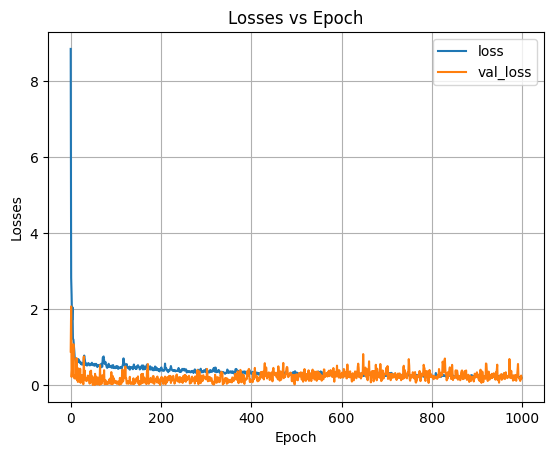

In [21]:
plt.figure()
plt.plot(trial.history['loss'], label='loss')
plt.plot(trial.history['val_loss'], label='val_loss')
plt.title("Losses vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.grid()
plt.legend()

### PREDICTING USING TRAINING DATA

In [22]:
test_run = model.predict(normal_predictor_train)

6/6 [==============================] - 0s 5ms/step


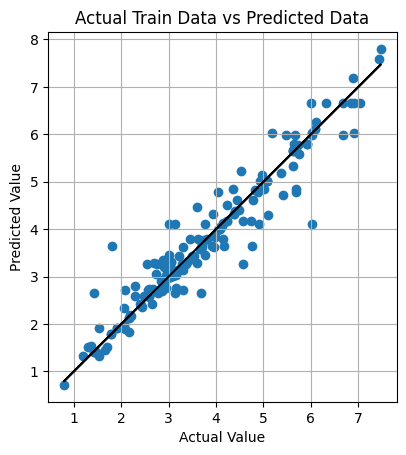

In [23]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(targ_train, test_run)
plt.title("Actual Train Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(targ, targ, 'k-')
plt.grid()

In [24]:
print(r2_score(targ_train, test_run))

0.9213269769660403


### PREDICTING FROM TEST DATA

In [26]:
prediction = model.predict(normal_predictor_test)

2/2 [==============================] - 0s 4ms/step


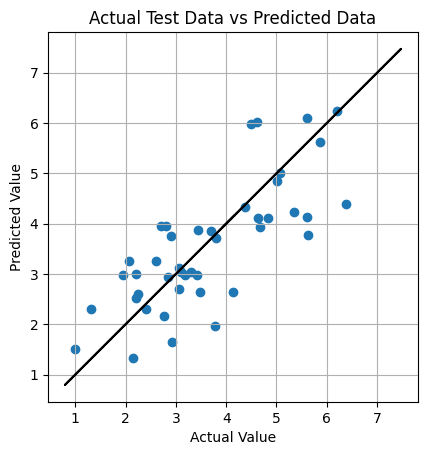

In [27]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(targ_test, prediction)
plt.title("Actual Test Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(targ_train, targ_train, 'k-')
plt.grid()

### PARITY CHART (COMPARING ACTUAL DATA AND PREDICTED DATA)

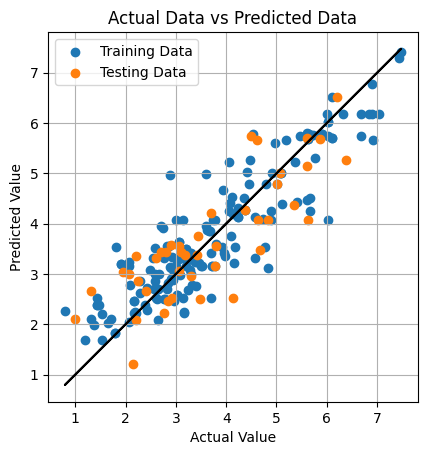

In [18]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(targ_train, test_run, label = 'Training Data')
plt.scatter(targ_test, prediction, label = 'Testing Data')
plt.legend()
plt.title("Actual Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(targ_train, targ_train, 'k-')
plt.grid()